In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('insurance.csv', encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

#DataFrame.count
# Count number of non-NA/null observations.

# DataFrame.max
# Maximum of the values in the object.

# DataFrame.min
# Minimum of the values in the object.

# DataFrame.mean
# Mean of the values.

# DataFrame.std
# Standard deviation of the observations.

# DataFrame.select_dtypes
# Subset of a DataFrame including/excluding columns based on their dtype.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

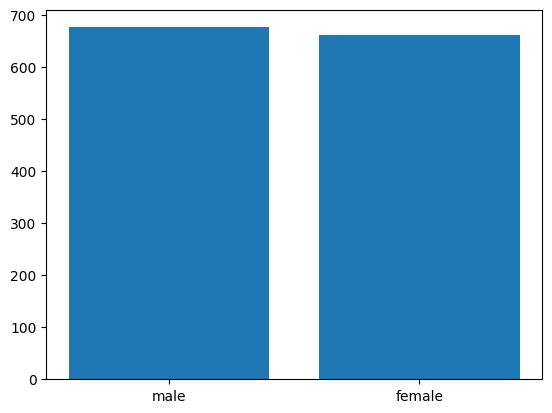

In [7]:
a = data['sex'].value_counts()
plt.bar(a.index, a.values)
plt.show() 
#соотношение полов практически поровну

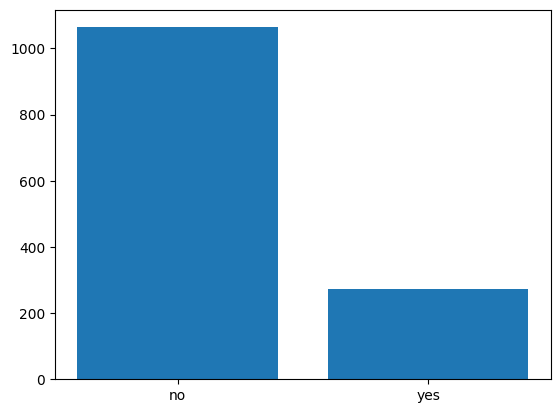

In [8]:
a = data['smoker'].value_counts()
plt.bar(a.index, a.values)
plt.show() 
#Не курящих значительно больше. Возможно, у тех кто курит, оплата за страховку будет больше

In [9]:
total_smokers = data['smoker'].value_counts()['yes']
print(total_smokers)
percentage_yes = total_smokers / data.shape[0]
print(percentage_yes)

#Соотношение курильщиков и не курящих составляет 20/80

274
0.20478325859491778


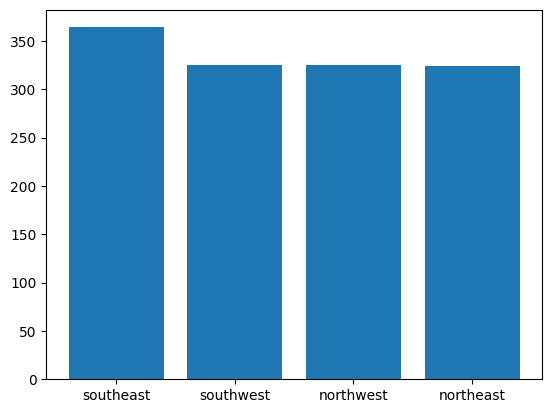

In [10]:
a = data['region'].value_counts()
plt.bar(a.index, a.values)
plt.show() 

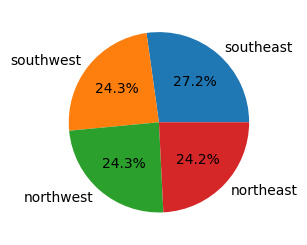

In [11]:
features = ['region']
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
 
    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
 
plt.show()

#распредление примерно поровну

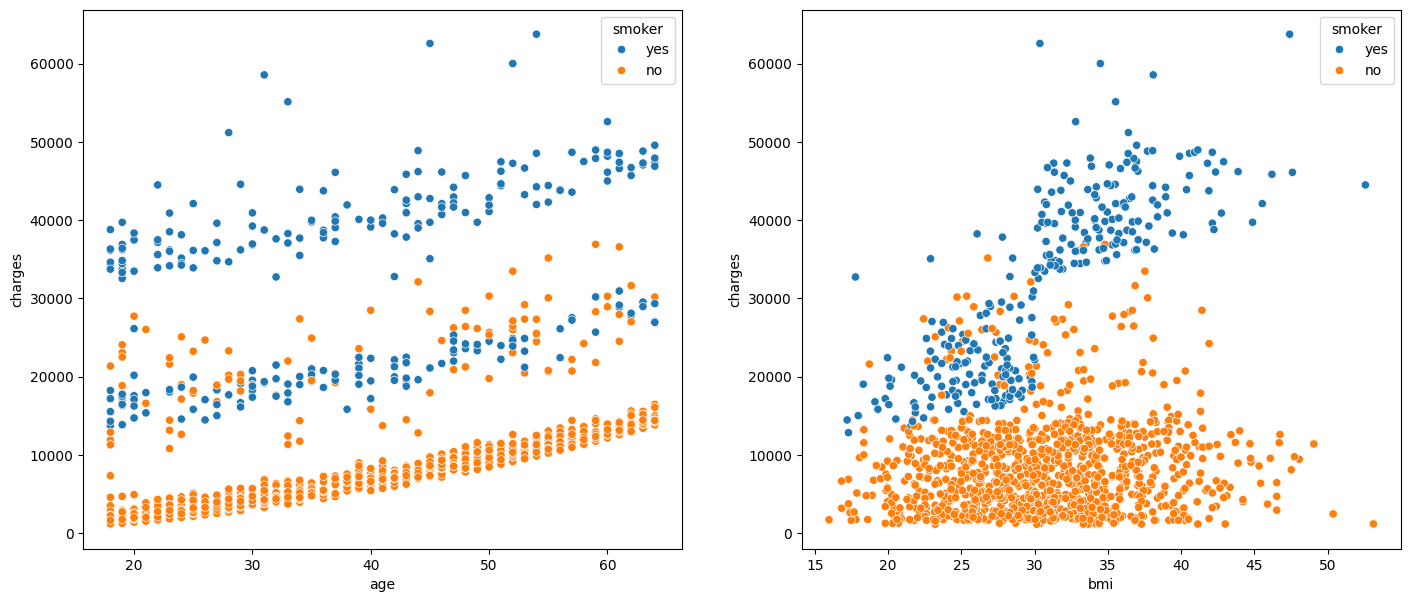

In [12]:
features = ['age', 'bmi']
 
plt.figure(figsize=(17,7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    sn.scatterplot(data=data, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

#с возрастом постепенно увеличивается оплата за страховку - очень поступаетльные изменения, отчетливо видно, что некурильщики платят в разы меньше. 
#гораздо больше людей, у который индекс массы тела не в норме(не в предлеха значений то 18.5 до 24.9), значения оплаты значительно больше за пределами этой нормы и также растут, все максимальные выбросы за 

<Figure size 2000x1000 with 0 Axes>

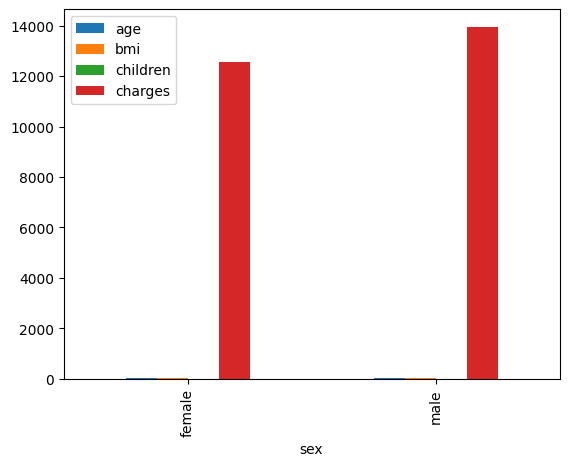

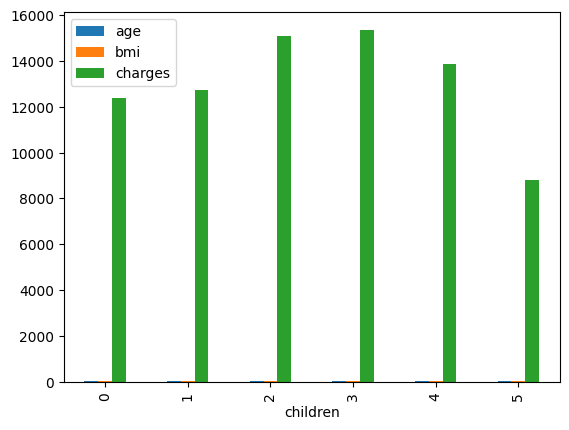

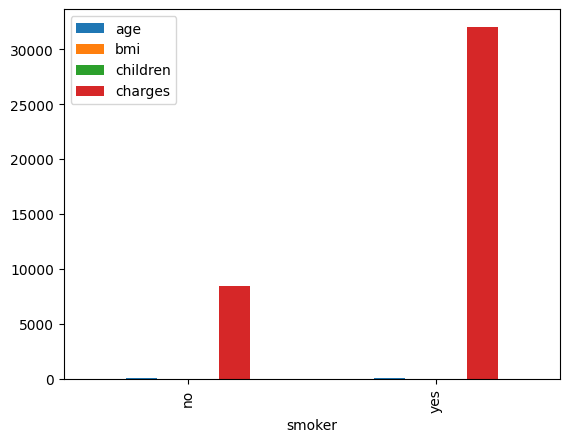

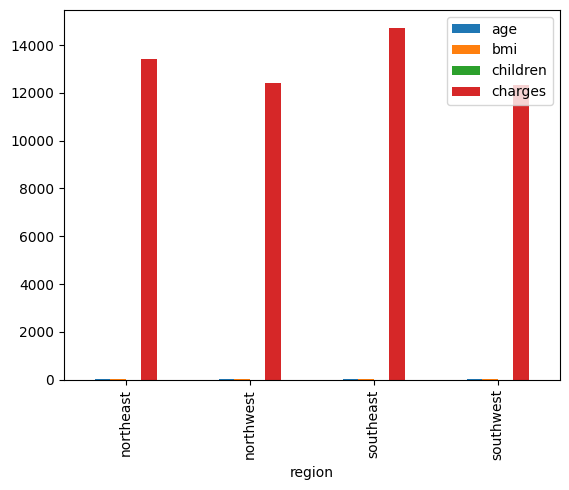

In [13]:
features = ['sex', 'children', 'smoker', 'region']
 
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    data.groupby(col).mean(['charges']).plot.bar()
plt.show()

#Оплата за страховку у мужчин и женщин примерно одинаковая, но чуть больше мужчин платят больше.
#График распредления оплаты неравномерен, больше всего платят семьи, в которых 2-3 ребенка. Можно предположить, что, начиная с 4 ребенка семьи становятся многодетными, поэтому у них могут быть определенные льготы. Когда же в семье 0 детей, их платат за страховку очевидно меньше.
#Оплата страховки с курильщиков, примерно в три раза больше, чем у некурящих.
#Тарифы примерно одинаковы в указанных четырех регионах.

<Axes: ylabel='age'>

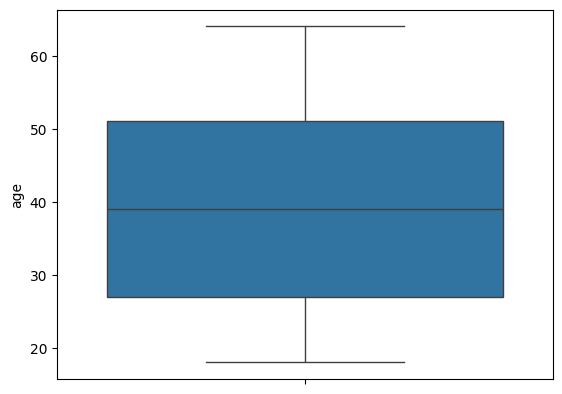

In [14]:
sn.boxplot(data['age']) 
#выбросов нет - средний возраст от 27-51 год, не репрезентативно

<Axes: ylabel='charges'>

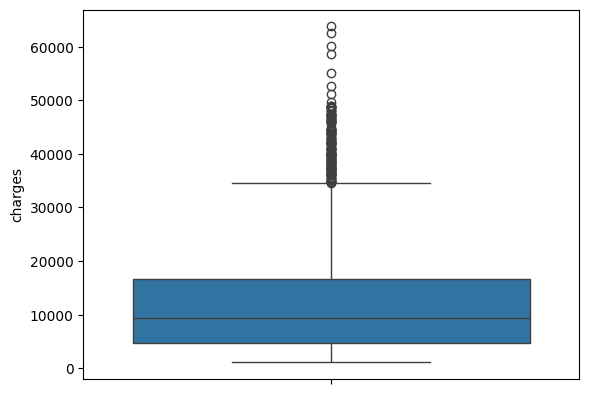

In [15]:
sn.boxplot(data['charges']) 
#выбросов начинаются от суммы выплат превыщающей 35 тысяч, среднее значение в пределах от 5тыс до 15тыс

In [16]:
a = np.where(data['charges'] > 35000)
print(a)
len(a[0])

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
         82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
        203,  240,  242,  251,  252,  254,  256,  263,  265,  271,  281,
        288,  292,  298,  312,  322,  327,  328,  330,  338,  373,  377,
        381,  420,  421,  422,  441,  476,  488,  500,  524,  530,  543,
        549,  558,  569,  577,  587,  609,  615,  621,  629,  665,  667,
        668,  674,  677,  682,  697,  706,  725,  736,  738,  739,  742,
        759,  803,  819,  826,  828,  842,  845,  850,  852,  856,  860,
        883,  893,  901,  917,  947,  951,  953,  956,  958, 1012, 1021,
       1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1090, 1096, 1111,
       1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207,
       1218, 1230, 1240, 1241, 1249, 1284, 1288, 1300, 1301, 1303, 1313,
       1323], dtype=int64),)


133

<Axes: ylabel='bmi'>

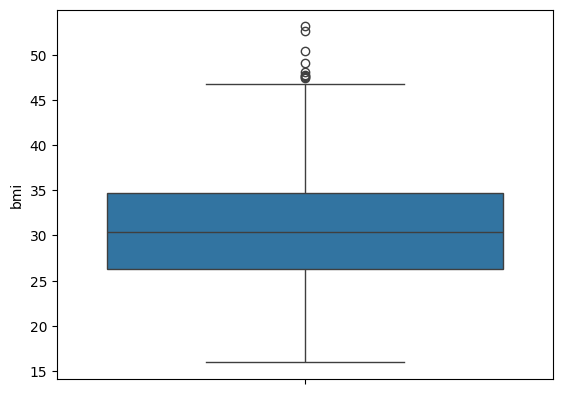

In [17]:
sn.boxplot(data['bmi']) 
#Есть выбросы начиная со значение 47, скорее всего это уже дейстивтельно экстремальный урочень bmi, который опасен для здоровья. Средний же уровень всё равно выше нормы, составляющей 18.5 - 24.9 кг/м:2

In [18]:
b = np.where(data['bmi'] > 47)
print(b)
len(b)
per_b = len(b[0])/ data.shape[0]
print(per_b)


#Видим что таких эксремальных значений немного - всего 9, как показывает вычисление ниже - это очень небольшой процент от всего сета, поэтому их можно заменить на средние значения 

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)
0.006726457399103139


In [19]:
outlier = data[data['bmi'] > 47].index
df = data.drop(outlier, axis=0)
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]


<Axes: ylabel='bmi'>

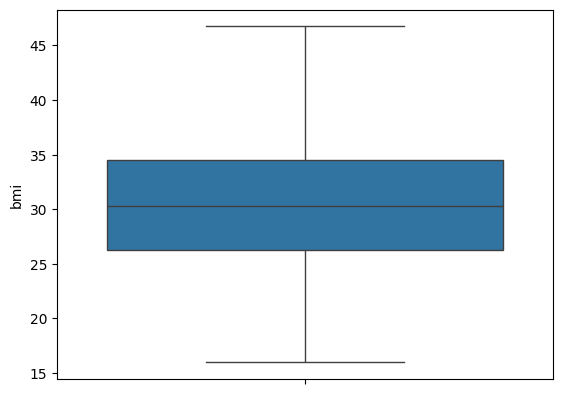

In [20]:
sn.boxplot(df['bmi']) 

In [21]:

replace_dict = {"male": 0, "female": 1}
df['sex'] = df['sex'].replace(replace_dict)
rep_dict = {"yes": 1, "no": 0}
df['smoker'] = df['smoker'].replace(rep_dict)
rep_di = {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
df['region'] = df['region'].replace(rep_di)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [22]:
cols = ["age","sex","bmi","children","smoker","region","charges"]
data_corr = df[cols].corr()
data_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019143,0.114686,0.043041,-0.024505,0.003597,0.302022
sex,0.019143,1.000000,-0.039958,-0.019281,-0.079854,-0.007047,-0.063394
bmi,0.114686,-0.039958,1.000000,0.017355,-0.002871,0.152816,0.193196
children,0.043041,-0.019281,0.017355,1.000000,0.007577,-0.001403,0.069739
smoker,-0.024505,-0.079854,-0.002871,0.007577,1.000000,0.010690,0.785912
region,0.003597,-0.007047,0.152816,-0.001403,0.010690,1.000000,0.007693
charges,0.302022,-0.063394,0.193196,0.069739,0.785912,0.007693,1.000000


<Axes: >

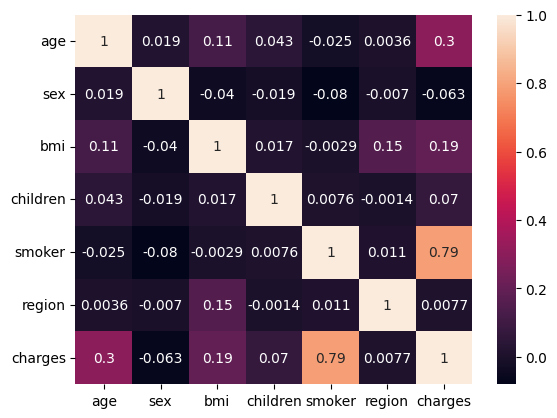

In [23]:
sn.heatmap(data_corr, annot = True)

#наибольшая корреляция между smokers и charges = 0.79, скорее всего работатьь с линейной регрессией нужно через эти параметры

Линейная регрессия

In [46]:
X = df.drop('charges', axis = 1).values
print(X)
print(type(X))
y = df['charges'].values
print(y)
print(type(y))

[[19.    1.   27.9   0.    1.    3.  ]
 [18.    0.   33.77  1.    0.    2.  ]
 [28.    0.   33.    3.    0.    2.  ]
 ...
 [18.    1.   36.85  0.    0.    2.  ]
 [21.    1.   25.8   0.    0.    3.  ]
 [61.    1.   29.07  0.    1.    0.  ]]
<class 'numpy.ndarray'>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
<class 'numpy.ndarray'>


In [47]:
normalized_X = (X - np.min(X)) / (np.max(X) - np.min(X))
print(normalized_X)

[[0.296875   0.015625   0.4359375  0.         0.015625   0.046875  ]
 [0.28125    0.         0.52765625 0.015625   0.         0.03125   ]
 [0.4375     0.         0.515625   0.046875   0.         0.03125   ]
 ...
 [0.28125    0.015625   0.57578125 0.         0.         0.03125   ]
 [0.328125   0.015625   0.403125   0.         0.         0.046875  ]
 [0.953125   0.015625   0.45421875 0.         0.015625   0.        ]]


In [48]:
normalized_y = (y - np.min(y)) / (np.max(y) - np.min(y))
print(normalized_y)

[0.25643068 0.00982054 0.05413265 ... 0.0082634  0.01441446 0.45581635]


In [128]:
#Инициализация параметров      
lr = 0.00002
epochs= 50000 
w = np.zeros(normalized_X.shape[1])
b = 0

#Функция ошибки
def MSE(normalized_y, y_pred):
    return np.mean((normalized_y - y_pred) ** 2)

for i in range (epochs):
    y_pred = np.dot(normalized_X, w) + b                
    loss = MSE(normalized_y, y_pred) 

    #производные по весу и по bias(смещениям)
    der_w = (1 / normalized_X.shape[1]) * (2 * np.dot(X.T, (y_pred-normalized_y)))
    der_b = (1 / normalized_X.shape[1]) * (2 * np.sum(y_pred-normalized_y))

    #обновление весов и bias 
    w -= lr * der_w
    b -= lr * der_b
    
    #вывод ошибки
    if (i + 1) % 1000 == 0:
        print(f'Эпоха [{i + 1}/{epochs}], Потери: {loss}') 


print('Предсказание:', (np.dot(normalized_X, w) + b)*100000)

Эпоха [1000/50000], Потери: 0.03282281739124373
Эпоха [2000/50000], Потери: 0.03167958385298636
Эпоха [3000/50000], Потери: 0.03063060201428209
Эпоха [4000/50000], Потери: 0.029655005420653174
Эпоха [5000/50000], Потери: 0.028739381713668924
Эпоха [6000/50000], Потери: 0.027874843396008965
Эпоха [7000/50000], Потери: 0.027055276982675642
Эпоха [8000/50000], Потери: 0.026276290535267303
Эпоха [9000/50000], Потери: 0.025534576955787737
Эпоха [10000/50000], Потери: 0.024827526017629793
Эпоха [11000/50000], Потери: 0.024152986020923143
Эпоха [12000/50000], Потери: 0.0235091159886425
Эпоха [13000/50000], Потери: 0.022894293005223974
Эпоха [14000/50000], Потери: 0.0223070533737367
Эпоха [15000/50000], Потери: 0.021746054670172106
Эпоха [16000/50000], Потери: 0.02121005081559098
Эпоха [17000/50000], Потери: 0.020697875329425467
Эпоха [18000/50000], Потери: 0.020208429774133143
Эпоха [19000/50000], Потери: 0.019740675529601615
Эпоха [20000/50000], Потери: 0.019293627729445886
Эпоха [21000/5000

Линейная регрессия


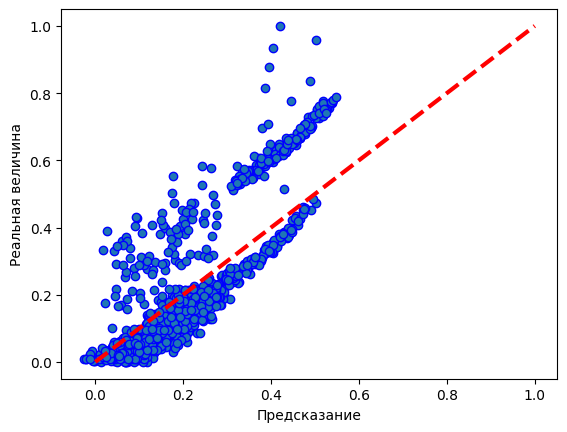

In [129]:
print('Линейная регрессия')
fig, ax = plt.subplots()
ax.scatter(y_pred, normalized_y, edgecolors=(0, 0, 1))
ax.plot([normalized_y.min(), normalized_y.max()], [normalized_y.min(), normalized_y.max()], 'r--', lw=3)
ax.set_xlabel('Предсказание')
ax.set_ylabel('Реальная величина')
plt.show()